<a href="https://colab.research.google.com/github/batlab-art/Introductions/blob/master/Course/OpenCV/3_OpenCV__Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q face_recognition
!pip install -q fer
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import face_recognition
import numpy as np
from PIL import ImageDraw
import PIL.Image
from io import BytesIO
from fer import FER
import cv2
import operator
import time
from google.colab import files
from google.colab.patches import cv2_imshow
detector = FER()

     |████████████████████████████████| 100.1 MB 16 kB/s 
     |████████████████████████████████| 810 kB 10.7 MB/s 
     |████████████████████████████████| 2.3 MB 39.2 MB/s 


##Take a photo

In [3]:
#@title
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


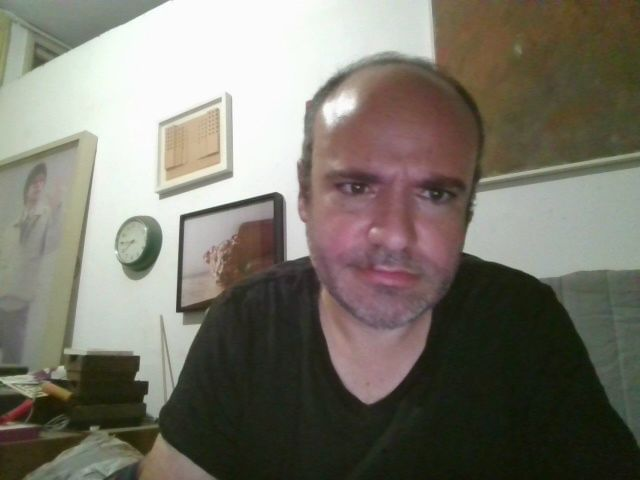

In [4]:
#@title
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

{'angry': 0.47, 'disgust': 0.0, 'fear': 0.07, 'happy': 0.01, 'sad': 0.09, 'surprise': 0.0, 'neutral': 0.37}


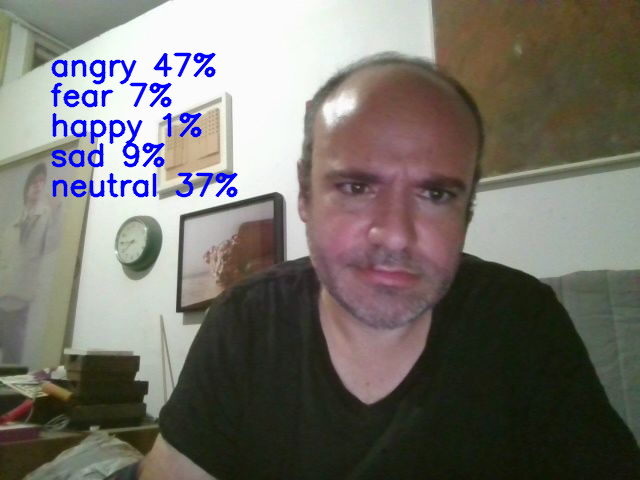

In [5]:
from fer import FER
import matplotlib.pyplot as plt 
import cv2
from google.colab.patches import cv2_imshow
import math

img = cv2.imread("photo.jpg")
detector = FER(mtcnn=True)
detector_result = detector.detect_emotions(img)

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
color = (255, 0, 0)
thickness = 2


emotions_dict = detector_result[0]['emotions']
print(emotions_dict)

y_pos = 25

for key, value in emotions_dict.items():
  if value > 0.0:
    org = (50, 50 + y_pos)
    img = cv2.putText(img, key + ' ' + str(round(value * 100.0)) + '%' , org, font, fontScale, color, thickness, cv2.LINE_AA)
    y_pos = y_pos + 30

cv2_imshow(img)

##Using OpenCV for face detection

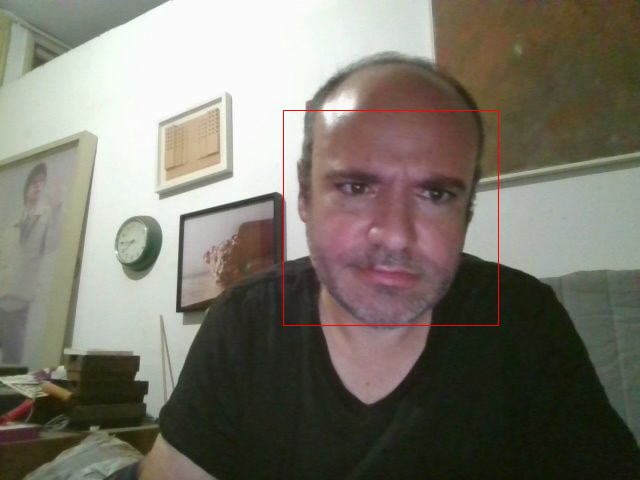

Time taken: 0.22765398025512695  seconds
Number of faces: 1


In [19]:
#@title Use Haar Cascades and draw a red box around the faces
start = time.time()
#Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#Read the input image
img = cv2.imread('photo.jpg')

#Convert into GrayScale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#Detect Faces
faces = face_cascade.detectMultiScale(gray, 1.12, 2)
#Draw rectangle around each faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 1)
#Display the output
cv2_imshow(img)

end = time.time()
print("Time taken:",end-start," seconds")
print("Number of faces:",len(faces))